In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('Titanic-Dataset.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

missing_values = data.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
dtype: int64

In [3]:

overall_survival_rate = data['Survived'].mean()
class_survival_rate = data.groupby('Pclass')['Survived'].mean()
sex_survival_rate = data.groupby('Sex')['Survived'].mean()
age_statistics = data['Age'].describe()

overall_survival_rate, class_survival_rate, sex_survival_rate, age_statistics


(np.float64(0.3838383838383838),
 Pclass
 1    0.629630
 2    0.472826
 3    0.242363
 Name: Survived, dtype: float64,
 Sex
 female    0.742038
 male      0.188908
 Name: Survived, dtype: float64,
 count    714.000000
 mean      29.699118
 std       14.526497
 min        0.420000
 25%       20.125000
 50%       28.000000
 75%       38.000000
 max       80.000000
 Name: Age, dtype: float64)

In [4]:

age_survived = data[data['Survived'] == 1]['Age']
age_not_survived = data[data['Survived'] == 0]['Age']

age_bins = [0, 12, 18, 30, 50, 80]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_group_survival_rate = data.groupby('AgeGroup')['Survived'].mean()

fare_statistics = data['Fare'].describe()
fare_survival_rate = data.groupby(pd.qcut(data['Fare'], 4))['Survived'].mean()

age_group_survival_rate, fare_statistics, fare_survival_rate

C:\Temp\ipykernel_45044\2690017365.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival_rate = data.groupby('AgeGroup')['Survived'].mean()
C:\Temp\ipykernel_45044\2690017365.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_rate = data.groupby(pd.qcut(data['Fare'], 4))['Survived'].mean()


(AgeGroup
 Child          0.579710
 Teen           0.428571
 Young Adult    0.355556
 Adult          0.423237
 Senior         0.343750
 Name: Survived, dtype: float64,
 count    891.000000
 mean      32.204208
 std       49.693429
 min        0.000000
 25%        7.910400
 50%       14.454200
 75%       31.000000
 max      512.329200
 Name: Fare, dtype: float64,
 Fare
 (-0.001, 7.91]     0.197309
 (7.91, 14.454]     0.303571
 (14.454, 31.0]     0.454955
 (31.0, 512.329]    0.581081
 Name: Survived, dtype: float64)

Column names: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85      

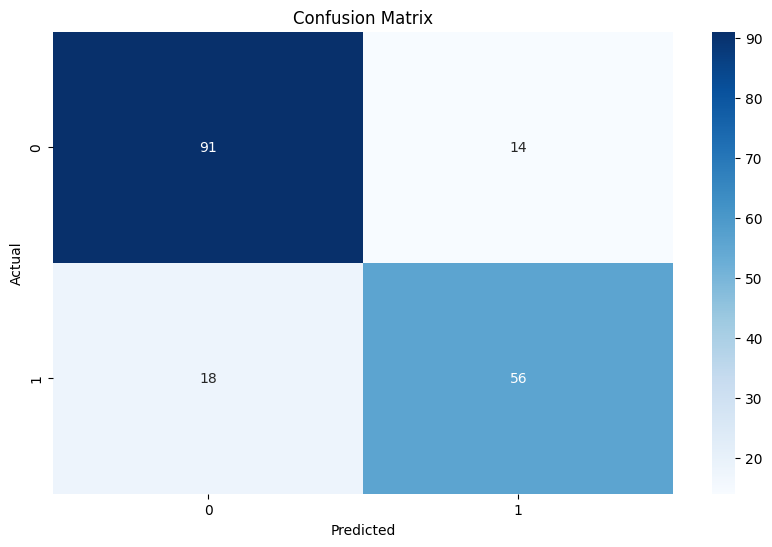

In [5]:

file_path = r'C:/Users/HP/Desktop/python/Titanic-Dataset.csv'
df = pd.read_csv(file_path)
print("Column names:", df.columns)

print(df.head())


target_column = 'Survived' 

df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

X = df.drop([target_column], axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()